#### **Intorduction to COCO dataset**

In this noteboook we will analyse the  Microsoft COCO dataset used for Image Captioning

In [1]:
%load_ext autoreload
%autoreload

In [54]:
import os
from pycocotools.coco import COCO


In [69]:
#initialize COCO API for caption annotations
train_data = 'train'
train_annotfile = 'Flickr8k_train.json'
coco = COCO(train_annotfile,is_flickr=True)

img_ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [70]:
#plot a sample image

In [72]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

caption_id = np.random.choice(img_ids)
image_id = coco.anns[caption_id]['image_id']
img = coco.loadImgs(image_id)


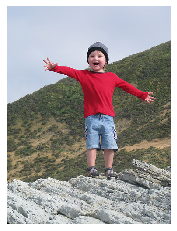

A boy in a red shirt stands on a mountain .
A boy in a red shirt with arms outstretched on the side of hill .
A little boy in red stands on top of a rock with a smile and outstretched arms .
A little child is wearing a red shirt and a beanie and is standing on some jagged rocks .
Little boy standing on some rocks .
5


In [105]:
image = Image.open('Flickr8k/Flicker8k_Dataset/{}.jpg'.format(image_id))
plt.imshow(image)
plt.axis('off')
plt.show()
annIds = coco.getAnnIds(imgIds=[img['id']])
anns = coco.loadAnns(annIds)
coco.showAnns(anns)



In [111]:
train_ids = COCO('Flickr8k_train.json').anns.keys()
val_ids = COCO('Flickr8k_val.json').anns.keys()
print("="*25)
print(" Number of instances:\n  Train data: {}\n  Validation data: {}".\
      format(len(train_ids)//5,len(val_ids)//5))
print("="*25)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
 Number of instances:
  Train data: 5999
  Validation data: 1000


In [82]:
import nltk
from collections import Counter
counter = Counter()
flickr_train = COCO('Flickr8k_train.json')
for i,_id in enumerate(train_ids):
    
    caption = str(flickr_train.anns[_id]['caption'])
    tokens = nltk.tokenize.word_tokenize(caption.lower())
    counter.update(tokens)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


In [83]:
words = list(counter.keys())
counts = list(counter.values())


In [84]:
import pandas as pd
counter_df = pd.DataFrame({'word':words,"count":counts})
counter_df = counter_df.sort_values("count",ascending=False)
counter_df.head(10)

,word,count
0,a,46777
10,.,27163
7,in,14083
8,the,13508
70,on,8006
3,is,6907
46,and,6671
2,dog,6159
44,with,5762
104,man,5374


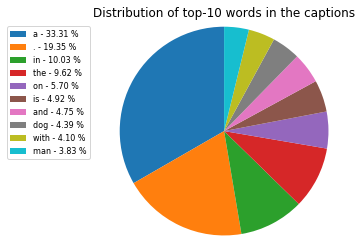

In [85]:
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

n = 10
x = np.char.array(counter_df['word'][:n])
y = np.array(counter_df['count'][:n])
# colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                       reverse=True))

a = ''.join(labels[0].split('-')[0].split("'")[1:])

labels = ['-'.join([''.join(l.split('-')[0].split("'")[1:]),l.split('-')[1]]) for l in labels]
plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.title('Distribution of top-{} words in the captions'.format(n))
plt.savefig('pie_plot_{}.jpg'.format(n), transparent=True, bbox_inches='tight', pad_inches=0)

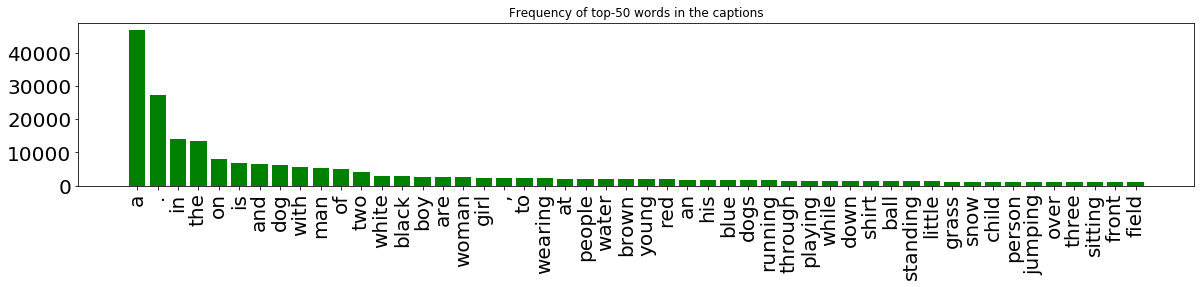

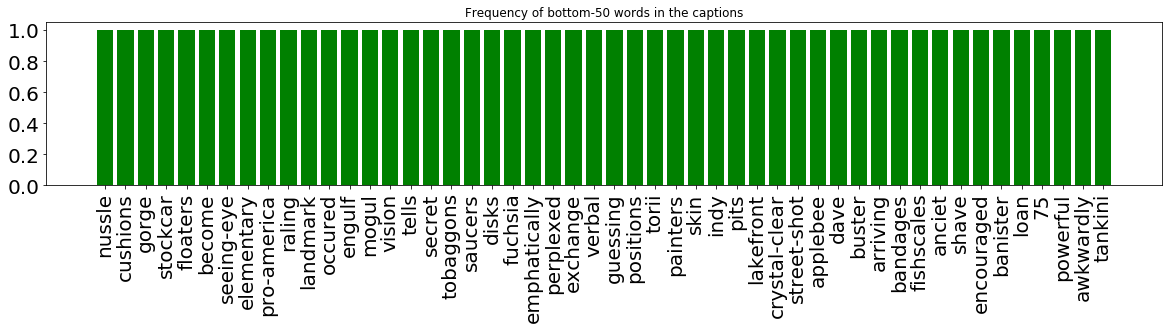

In [95]:
def plot_bar(df,n,order='top'):
    plt.figure(figsize=(20,3))
    if (order=='top'):
        words = df['word'][:n]
        counts = df['count'][:n]
    else:
        words = df['word'][-n:]
        counts = df['count'][-n:]
    
    barlist = plt.bar(words,counts,color='g')
    plt.yticks(fontsize=20)
    plt.xticks(words,rotation=90,fontsize=20)
    plt.title("Frequency of {}-{} words in the captions".format(order,n,fontsize=20))
    plt.savefig('hist_plot_{}.jpg'.format(n), transparent=True, bbox_inches='tight', pad_inches=0)
    plt.show()
    
    
n = 50
plot_bar(counter_df,n)
plot_bar(counter_df,n,order='bottom')

In [108]:
t_coco = COCO(train_annotfile,is_flickr=True)
train_ids = t_coco.anns.keys()

for tid in list(train_ids):
    timg = t_coco.anns[caption_id]['image_id']
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    if (len(anns)!=5):
        print(anns)
    


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


dict_keys(['25132600132133', '25132600142133', '25132600152133', '25132600162133', '25132600172133', '29036175502133', '29036175522133', '29036175542133', '29036175562133', '29036175582133', '33382919242133', '33382919272133', '33382919302133', '33382919332133', '33382919362133', '4884160492133', '4884160532133', '4884160572133', '4884160612133', '4884160652133', '26443268222133', '26443268272133', '26443268322133', '26443268372133', '26443268422133', '2183423642133', '2183423702133', '2183423762133', '2183423822133', '2183423882133', '25019689422133', '25019689492133', '25019689562133', '25019689632133', '25019689702133', '26993428682133', '26993428762133', '26993428842133', '26993428922133', '26993429002133', '26383694762133', '26383694852133', '26383694942133', '26383695032133', '26383695122133', '29267869122133', '29267869222133', '29267869322133', '29267869422133', '29267869522133', '28513049212133', '28513049322133', '28513049432133', '28513049542133', '28513049652133', '34238025